In [22]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
dataset = pd.read_csv('breast-cancer.csv')

In [24]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

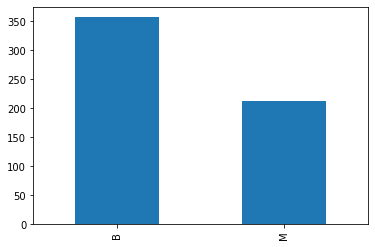

In [27]:
dataset.diagnosis.value_counts().plot(kind='bar')

In [28]:
dataset.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['diagnosis'] = encoder.fit_transform(dataset['diagnosis'])

In [30]:
null = pd.DataFrame(dataset.isnull().sum()).rename(columns={0:'Total'})
null['percentage'] = null['Total'] / len(dataset)
null.sort_values('percentage', ascending=False, inplace=True)
null.head()

,Total,percentage
id,0,0.0
diagnosis,0,0.0
symmetry_worst,0,0.0
concave points_worst,0,0.0
concavity_worst,0,0.0


In [31]:
# LEts look for redundant variables
correlation = dataset.corr()
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))
redundant = [col for col in upper if np.any(np.abs(upper[col]) >= 0.95)]
redundant

['perimeter_mean',
 'area_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst']

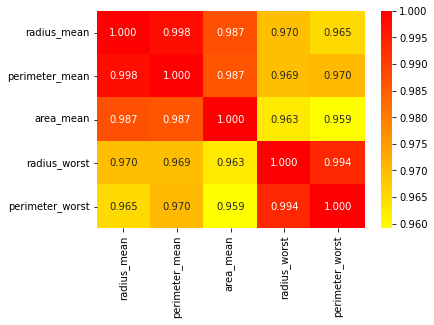

In [32]:
sns.heatmap(correlation.loc[correlation['perimeter_mean'].abs() >= 0.95, correlation['perimeter_mean'].abs() >= 0.95],
            annot=True, cmap=plt.cm.autumn_r, fmt='0.3f')

In [33]:
dataset.drop(redundant, inplace=True, axis=1)

In [34]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
# Lets split the dataset 

train = dataset[0 : int(0.7 * len(dataset))]
val = dataset[int(0.7 * len(dataset)):int(0.9 * len(dataset))]
test = dataset[int(0.9 * len(dataset)):]

In [36]:
train.shape

(398, 25)

In [37]:
train_label = train['diagnosis']
train = train.drop(['diagnosis'], axis=1)

val_label = val['diagnosis']
val = val.drop(['diagnosis'], axis=1)

test_label = test['diagnosis']
test = test.drop(['diagnosis'], axis=1)

In [38]:
mean = train.mean()
std = train.std() + 1e-12

train = (train - mean) / std
val = (val - mean) / std
test = (test - mean) / std

In [39]:
train.shape

(398, 24)

In [45]:
def train_loader(data, labels, batchsize=32, buffersize=100):
  dataset = tf.data.Dataset.from_tensor_slices((data, labels))
  dataset = dataset.cache().shuffle(buffersize).batch(batchsize)
  dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
  return dataset

In [46]:
def val_loader(data, labels, batchsize=32):
  dataset = tf.data.Dataset.from_tensor_slices((data, labels))
  dataset = dataset.cache().batch(batchsize)
  dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
  return dataset

In [47]:
def test_loader(data, batchsize=32):
  dataset = tf.data.Dataset.from_tensor_slices(data)
  dataset = dataset.cache().batch(batchsize)
  dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
  return dataset

In [48]:
train_load = train_loader(train.to_numpy(), train_label.to_numpy())
val_load = val_loader(val.to_numpy(), val_label.to_numpy())
test_load = test_loader(test.to_numpy())

In [50]:
for X, Y in train_load.take(1):
  print(X.shape)
  print(Y.shape)

(32, 24)
(32,)


In [67]:
METRICS = [
           tf.keras.metrics.TruePositives(name='tp'),
           tf.keras.metrics.FalsePositives(name='fp'),
           tf.keras.metrics.TrueNegatives(name='tn'),
           tf.keras.metrics.FalseNegatives(name='fn'),
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall'),
           tf.keras.metrics.AUC(name='auc'),
           tf.keras.metrics.BinaryAccuracy(name='accuracy'),
           tf.keras.metrics.AUC(name='prc', curve='PR')
]

In [68]:
zeros, ones = np.bincount(dataset.diagnosis.to_numpy())
total = zeros + ones
bias = np.log(ones / zeros)

w0 = (1 / zeros) * (total / 2.0)
w1 = (1 / ones) * (total / 2.0)

class_weights = {0 : w0, 1: w1}

In [69]:
class_weights

{0: 0.7969187675070029, 1: 1.3419811320754715}

In [70]:
def create_model(output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)

  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(input_shape=[24]),
                                      tf.keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
                                      tf.keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)
  ])
  return model

In [71]:
bias

-0.5211495071076266

In [72]:
model = create_model(bias)

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 100)               2500      
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=METRICS)

In [75]:
earlystop = tf.keras.callbacks.EarlyStopping(patience=15, monitor='val_prc')
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_cancer_model/', save_best_only=True)

In [76]:
history = model.fit(train_load, validation_data=val_load, epochs=100, class_weight=class_weights, callbacks=[earlystop, checkpoint])

Epoch 1/100
13/13 [==============================] - 4s 166ms/step - loss: 0.6226 - tp: 67.0000 - fp: 4.0000 - tn: 221.0000 - fn: 106.0000 - precision: 0.9437 - recall: 0.3873 - auc: 0.8704 - accuracy: 0.7236 - prc: 0.8425 - val_loss: 0.2878 - val_tp: 22.0000 - val_fp: 3.0000 - val_tn: 86.0000 - val_fn: 3.0000 - val_precision: 0.8800 - val_recall: 0.8800 - val_auc: 0.9712 - val_accuracy: 0.9474 - val_prc: 0.8949
Epoch 2/100
13/13 [==============================] - 1s 68ms/step - loss: 0.3342 - tp: 141.0000 - fp: 9.0000 - tn: 216.0000 - fn: 32.0000 - precision: 0.9400 - recall: 0.8150 - auc: 0.9662 - accuracy: 0.8970 - prc: 0.9556 - val_loss: 0.2162 - val_tp: 23.0000 - val_fp: 4.0000 - val_tn: 85.0000 - val_fn: 2.0000 - val_precision: 0.8519 - val_recall: 0.9200 - val_auc: 0.9881 - val_accuracy: 0.9474 - val_prc: 0.9710
Epoch 3/100
13/13 [==============================] - 1s 66ms/step - loss: 0.2382 - tp: 150.0000 - fp: 9.0000 - tn: 216.0000 - fn: 23.0000 - precision: 0.9434 - recall: 0

In [80]:
def plot_metrics(history):
  plt.figure(figsize=(20,20))
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend();

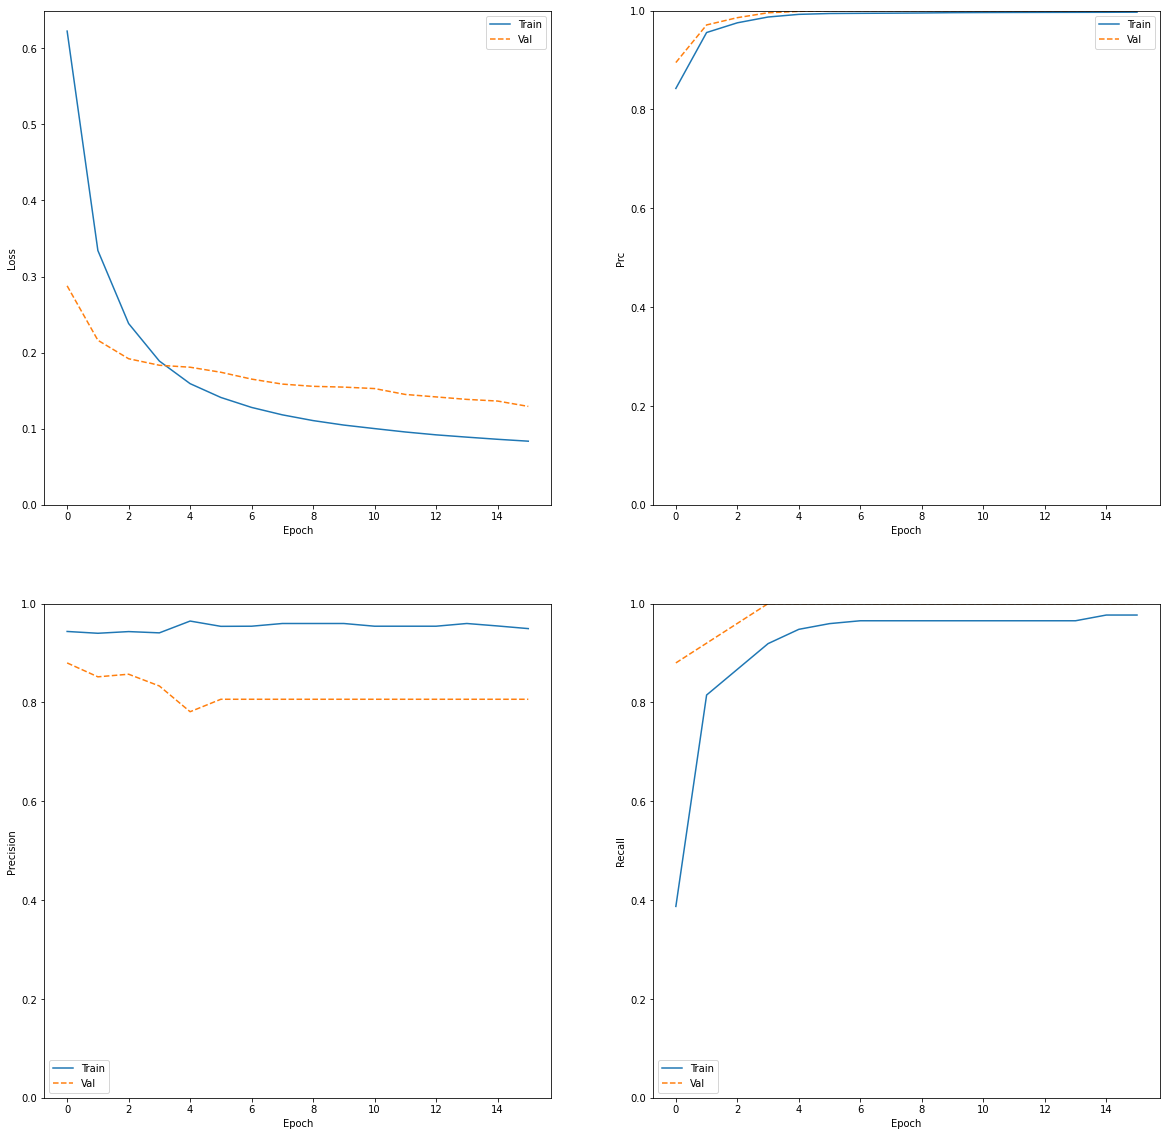

In [81]:
plot_metrics(history)

In [82]:
model = tf.keras.models.load_model('best_cancer_model')

In [85]:
prediction = model.predict(test_load)

In [ ]:
prediction = np.where(prediction >= 0.5, 1, 0)
prediction

In [90]:
tf.keras.metrics.binary_accuracy(test_label.to_numpy(), tf.squeeze(prediction, axis=-1))

<tf.Tensor: shape=(), dtype=float32, numpy=0.9122807>